In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from operator import add

## Définition des fonctions de lecture d'instance et d'affichage

In [39]:
def LectureInstance(nomFichier):
    """Fonction permettant de lire les instances (quelque soit le nombre de critères (séparés par un espace dans le fichier))
    Paramètres : nomFichier le nom du fichier d'instance
    Retourne n le nombre d'objets, W la capacité du sac à dos, w la liste de poids des objets, et v la liste de vecteur
    de valuation des objets (sous la forme [liste des valuations de l'objet 1, liste des valuations de l'objet 2, ...])"""
    # Lecture du fichier
    with open(nomFichier, 'r') as f:
        allLines = f.readlines()
        
    nbLignesPassees = 0 # Le nombre de lignes sautées (car commentaires ou définition de valeur de n ou de W)

    for i, line in enumerate(allLines): # On parcourt les lignes du fichiers
        if line[0] == 'i': # On met à jour les données de l'objet du numéro de ligne - le nombre de lignes passées
            objets[i-nbLignesPassees] = list(map(int, line.rstrip().lstrip("i ").split(" ")))
        else:
            nbLignesPassees += 1 # On augmente le nombre de lignes passées
            if line[0] == 'n':
                n = int(line[1:])
                # Maintenant que l'on a récupéré n, on peut récupérer le nombre de colonnes (et donc de critères) sur la ligne suivante
                taille = len(allLines[i+1].rstrip().lstrip("c ").split(" "))
                objets = np.empty((n, taille)) 
            if line[0] == 'W':             
                W = int(line[1:])

    return n, W, objets[:, 0], objets[:, 1:]

def LectureInstanceParticuliere(nomFichier, nbObj, nbCrit):
    """Fonction permettant de lire les instances en précisant le nombre d'objets et le nombre de critères souhaités (si on souhaite plus d'objets 
    (ou de critères) qu'il y en a dans le fichier, on prendra touts les objets (ou critères) du fichier en entrée)
    Paramètres : nomFichier le nom du fichier d'instance
                 nbObj le nombre d'objets souhaités
                 nbCrit le nombre de critères souhaités
    Retourne n le nombre d'objets, W la capacité du sac à dos, w la liste de poids des objets, et v la liste de vecteur
    de valuation des objets (sous la forme [liste des valuations de l'objet 1, liste des valuations de l'objet 2, ...])"""
    # Lecture du fichier
    with open(nomFichier, 'r') as f:
        allLines = f.readlines()
        
    nbLignesPassees = 0 # Le nombre de lignes sautées (car commentaires ou définition de valeur de n ou de W)
    sommeWi = 0 # La somme de poids des objets à considérer

    for i, line in enumerate(allLines): # On parcourt les lignes du fichiers
        if line[0] == 'i': # On met à jour les données de l'objet du numéro de ligne - le nombre de lignes passées
            if i-nbLignesPassees < nbObj: # Sinon, on a déjà assez d'objets (le nombre demandé)
                # On ne prends que nbCrit critères + le poids w pour chaque objet
                objets[i-nbLignesPassees] = list(map(int, line.rstrip().lstrip("i ").split(" ")))[:nbCrit+1] 
                sommeWi += objets[i-nbLignesPassees, 0]
                # print("PB, on ajoute", objets[i-nbLignesPassees, 0],"à sommeWi")
        else:
            nbLignesPassees += 1 # On augmente le nombre de lignes passées
            if line[0] == 'n':
                n = int(line[1:]) # Le nombre d'objets dans le fichier
                # Maintenant que l'on a récupéré n, on peut récupérer le nombre de colonnes (et donc de critères) sur la ligne suivante
                taille = len(allLines[i+1].rstrip().lstrip("c ").split(" "))
                if n < nbObj: # Si nbObj > nombre d'objets dans le fichier 
                    nbObj = n # On retourne alors seulement n objets

                if taille - 1 < nbCrit: # Si nbCrit > nombre de critères dans le fichier
                    # print("PB taille =", taille)
                    nbCrit = taille - 1 # On prend des objets sur seulement le nombre de critères dans le fichier alors

                objets = np.empty((nbObj, nbCrit + 1)) # Les critères en nombre demandé + le poids de l'objet

    W = math.floor(sommeWi/2) # On fixe le W comme indiqué dans l'énoncé
    return nbObj, W, objets[:, 0], objets[:, 1:]
 
# Test
n, W, w, v = LectureInstance("2KP200-TA-0.dat")
# print(n,W,w,v)

n, W, w, v = LectureInstanceParticuliere("2KP200-TA-0.dat", 20, 3)
print(n,W,w,v)

20 6232 [394. 911. 768. 477. 513. 636. 607. 138. 401. 998. 839. 637. 972. 527.
 891. 807. 949. 193. 349. 458.] [[783. 840. 906.]
 [198. 798. 820.]
 [278. 335. 100.]
 [629. 554. 933.]
 [952. 365. 941.]
 [717. 916. 493.]
 [ 17. 142. 736.]
 [804. 243. 318.]
 [130. 157. 821.]
 [219. 109. 181.]
 [613. 513. 844.]
 [524. 296.  23.]
 [293. 494. 281.]
 [770. 771. 380.]
 [284. 400. 762.]
 [919. 353. 830.]
 [526.  70. 158.]
 [663.  86. 261.]
 [ 65. 890. 365.]
 [ 64.  21.  53.]]


In [13]:
def LecturePtsNonDom(nomFichier):
    """Fonction permettant de lire le fichier de point non dominé (TME pour le sac à dos à 2 critères)
    Paramètres : nomFichier le nom du fichier d'instance"""
    f = open(nomFichier, "r")
    NonDom = []
    for line in f:
        line_splited = line.split()
        NonDom.append((int(line_splited[0]), int(line_splited[1])))           
    return NonDom
  
# Test
NonDom = LecturePtsNonDom("InstancesMOKP/100_items/2KP100-TA-0.eff")

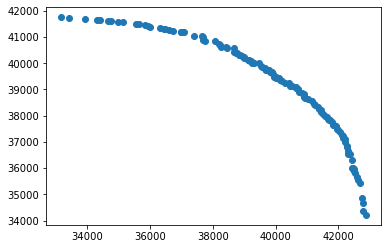

In [14]:
def DrawNonDom(NonDom):
    """Fonction permettant d'afficher les points non dominés (TME pour le sac à dos à 2 critères)
    Paramètres : NonDom est un ensemble de solutions (non dominées sur deux critères)"""
    plt.scatter(*zip(*NonDom))
    plt.show()
    
# Test
DrawNonDom(NonDom)

In [98]:
def AfficheSolution(X, v):
    """Fonction permettant d'afficher de façon claire l'ensemble des solutions (les objets à prendre + le vecteur de valuation associé)
    Paramètres : X un ensemble de solutions (une solution est un vecteur dans lequel sol[i] vaut 1 si on a pris l'objet i et 0 sinon)
                 v est la matrice de valuation des objets sur les différents critères"""
    print("Il y a ", len(X), " solutions :")
    for sol in X: # On parcourt les solutions
        objetsPris = []
        for ind in range(len(sol)): # On parcourt les objets
            if sol[ind] == 1:
                objetsPris.append(ind)
        print("Objets à prendre : ", objetsPris, " de valuation ", f(sol, v))            

## Définition des indicateurs de qualité

In [99]:
def PYN(YnHat, NonDom):
    """Indicateur de qualité PYN (TME pour le sac à dos à 2 critères)
    Paramètres : YnHat est une approximation des points non-dominés
                 NonDom est l’ensemble des points rééllement non-dominés"""
    return len(set(YnHat)&set(NonDom))/len(NonDom)

def DM(YnHat, NonDom):
    """Indicateur de qualité DM (TME pour le sac à dos à 2 critères)
    Paramètres : YnHat est une approximation des points non-dominés
                 NonDom est l’ensemble des points rééllement non-dominés"""

    def pk(NonDom):
        """Renvoie les poids p1 et p2 (TME pour le sac à dos à 2 critères)"""
        # ON EST EN MAXIMISATION !!!!
        y1ptIdeal = max([NonDom[i][0] for i in range(len(NonDom))])
        y2ptIdeal = max([NonDom[i][1] for i in range(len(NonDom))])
        y1ptNadir = min([NonDom[i][0] for i in range(len(NonDom))])
        y2ptNadir = min([NonDom[i][1] for i in range(len(NonDom))])

        return (1/(y1ptIdeal-y1ptNadir), 1/(y2ptIdeal-y2ptNadir))

    def d(pt1, pt2, NonDom):
        """Renvoie la distance euclidienne pondérée entre les points pt1 et pt2 (TME pour le sac à dos à 2 critères)"""
        p1, p2 = pk(NonDom)
        res = p1*(pt1[0]-pt2[0])**2 + p2*(pt1[1]-pt2[1])**2
        return math.sqrt(res)

    def dPrime(YnHat, pt1, NonDom):
        """Renvoie dPrime de YnHat et pt1 (TME pour le sac à dos à 2 critères)"""
        return min(d(pt2,pt1,NonDom) for pt2 in YnHat)

    return sum(dPrime(YnHat, pt1, NonDom) for pt1 in NonDom)/len(NonDom)
 
# Test    
print(DM([(0,0),(10,20)],NonDom))

605.1764642536623


# Une première procédure de résolution

## Définition de la PLS (avec des listes simples)

In [100]:
def popInitiale(W,w):
    """Fonction initialisant la population (TME pour le sac à dos à 2 critères PB marche aussi jpense)
    La population initiale sera constituée d’une seule solution réalisable, générée aléatoirement :
    tant qu’il reste de la place dans le sac, un objet choisi aléatoirement (de poids inférieur à la quantité de place restante) est ajouté
    Paramètres : W est la capacité du sac
                 w est la liste de poids des objets
    Retourne une population initiale sous la fome de liste de liste (liste contenant une seule solution)"""
    Wtemp = W
    n = len(w) # Le nombre d'objets
    Lsol = [0 for i in range(n)]
    tupled = list(zip(w, range(n)))
    sortedByValue = sorted(tupled, key=lambda tup: tup[0])
    possibleObject = [(x,y) for x,y in sortedByValue if x<=W]
    while len(possibleObject)>0:
        r=random.randint(0,len(possibleObject)-1)
        Lsol[possibleObject[r][1]]=1
        Wtemp-=possibleObject[r][0]
        possibleObject.pop(r)
        possibleObject=[(x,y) for x,y in possibleObject if x<=Wtemp]
    return [Lsol]
    
    
def somme(x,w):
    """Fonction indiquant le poids des objets sélectionnés (TME pour le sac à dos à 2 critères PB marche aussi jpense)
    Paramètres : x est le vecteur dans lequel x[i] indique 1 si on a pris l'objet i et 0 sinon
                 w est la liste de poids des objets
    Retourne le poids total des objets sélectionnés"""
    somme = 0
    for k in range(len(x)):
        if(x[k] == 1):
            somme += w[k]
    return somme

def f(x, v):
    """Fonction retournant la valuation de la solution sur tous les critères (on est en maximisation)
    Paramètres : x est le vecteur dans lequel x[i] indique 1 si on a pris l'objet i et 0 sinon
                 v est la matrice de valuation des objets sur les différents critères
    Retourne le vecteur de valuation (gain) de la solution sur tous les critères"""
    nbCriteres = len(v[0]) # nbCriteres est le nombre de critères à considérer
    vecteurCout = np.zeros(nbCriteres) # VecteurCout est le vecteur de valuation (coût ou gain)
    
    for crit in range(nbCriteres): # On parcourt les différents critères
        vecteurCout[crit] = sum(v[i,crit]*x[i] for i in range(len(x))) # On parcourt tous les objets        
    return vecteurCout

def incomparable(a, b, v):
    """Fonction qui renvoie vrai si b et a sont incomparable et faux sinon, càd si l'un domine strictement l'autre
    Paramètres : a est un vecteur dans lequel a[i] indique 1 si on a pris l'objet i et 0 sinon (vecteur caractérisant une solution)
                 b est un autre vecteur caractérisant une solution, càd dans lequel b[i] indique 1 si on a pris l'objet i et 0 sinon
                 v est la matrice de valuation des objets sur les différents critères
    Retourne vrai si b et a sont incomparable et faux sinon, càd si l'un domine strictement l'autre"""
    if(a==b): # PB
        return True # Cas particulier
    
    nbCriteres = len(v[0]) # nbCriteres est le nombre de critères à considérer
    
    f_a=f(a,v)
    f_b=f(b,v)
    
    domine = -1 # domine est un booléen contenant vrai si a meilleur que b et faux sinon
    for crit in range(nbCriteres):
        if(f_a[crit]!= f_b[crit]):
            if(domine == -1): # On initialise le booléen domine
                domine = (f_a[crit]> f_b[crit])
            
            if(f_a[crit]> f_b[crit] and domine == False):
                return True # Ici, b était meilleur que a et a est actuellement meilleur que b (incomparable)
            
            if(f_a[crit]< f_b[crit] and domine == True):
                return True # Ici, a était meilleur que b et b est actuellement meilleur que a (incomparable)
    return False # Ici, a domine b ou b domine a # PB on pourait aussi donner le sens de la domination ici

def domine(a, b, v):
    """Fonction qui renvoie vrai si a domine b et faux sinon
    Paramètres : a est un vecteur dans lequel a[i] indique 1 si on a pris l'objet i et 0 sinon (vecteur caractérisant une solution)
                 b est un autre vecteur caractérisant une solution, càd dans lequel b[i] indique 1 si on a pris l'objet i et 0 sinon
                 v est la matrice de valuation des objets sur les différents critères
    Retourne vrai si a domine b et faux sinon"""
    if(a == b): # Cas particulier d'égalité
        return False
    nbCriteres = len(v[0]) # nbCriteres est le nombre de critères à considérer
    
    f_a=f(a,v)
    f_b=f(b,v)
    
    for crit in range(nbCriteres):
        if(not(f_a[crit]>= f_b[crit])):
            return False # Ici, b est meilleur que a au moins pour un critère (donc a ne domine pas b)
    return True # Ici, b n'est jamais meilleur que a donc a domine b

def non_domine(a, b, v):
    """Fonction qui renvoie vrai si a n'est pas dominé par b et faux sinon, càd si a est dominé par b
    Paramètres : a est un vecteur dans lequel a[i] indique 1 si on a pris l'objet i et 0 sinon (vecteur caractérisant une solution)
                 b est un autre vecteur caractérisant une solution, càd dans lequel b[i] indique 1 si on a pris l'objet i et 0 sinon
                 v est la matrice de valuation des objets sur les différents critères
    Retourne vrai si a n'est pas dominé par b et faux sinon, càd si a est dominé par b"""
    return not(domine(b,a,v))


def MiseAJour(X, x, v):
    """Mise à jour de la liste X en cherchant à ajouter potentiellement x (TME pour le sac à dos à 2 critères PB Marche aussi jpense)
    Cette procédure renverra un booléan égal à Vrai si la solution a été ajoutée dans la liste
    Paramètres : X un ensemble de solutions (une solution est un vecteur dans lequel sol[i] vaut 1 si on a pris l'objet i et 0 sinon)
                 x est une nouvelle solution (un vecteur dans lequel x[i] indique 1 si on a pris l'objet i et 0 sinon)
                 v est la matrice de valuation des objets sur les différents critères
    Retourne vrai si on a ajouté x à X et faux sinon (càd si x était dominé par un élément de X)"""
    elemsAenlever = []
    for sol in X:
        if sol == x: # Si x est déjà dans X, on ne l'ajoute pas une seconde fois
            return False
        # On n'ajoute pas une solution si elle a les mêmes valeurs dans l'espace des critères qu'une solution déjà sauvegardée
        # (une solution par valuation dans l'espace des critères suffit)
        if all(f(sol,v) == f(x,v)): 
            # if sol != x: # PB
            #     print("OH")
            # print("sol = ", sol)
            # print("x = ", x)
            # print("f(sol,v) = ", f(sol,v))
            # print("f(x,v) = ", f(x,v))
            return False 
        if domine(sol,x,v):
            return False
        elif domine(x,sol,v):
            elemsAenlever.append(sol) 
            
    for y in elemsAenlever:
        X.remove(y)
        
    X.append(x)
    return True

def Voisin(x, W, w): 
    """(TME pour le sac à dos à 2 critères PB Marche aussi jpense)
    Paramètres : x est le vecteur dans lequel x[i] indique 1 si on a pris l'objet i et 0 sinon
                 W est la capacité du sac
                 w est la liste de poids des objets
    Retourne N la liste des voisins"""
    n = len(x) # Le nombre d'objets
    N = []
    Wrestant = W - sum(w[i]*x[i] for i in range(len(x))) 
    for i in range(n): # On parcourt les objets
        if(x[i]==1):
            Wpossible = Wrestant + w[i] # On enlève le poids de l'objet i
            res = x.copy()
            listOfPossible = [k for k in range(n) if res[k]==0 and w[k]<= Wpossible]
            for j in listOfPossible:
                res2 = res.copy()
                res2[j] = 1
                Wpossible2 = Wpossible - w[j] # On ajoute le poids de l'objet j
                listOfPossible2 = [k for k in range(n) if res2[k]==0 and w[k]<= Wpossible2]
                while listOfPossible2 !=[]:
                    randomi = listOfPossible2[random.randint(0,len(listOfPossible2)-1)]
                    res2[randomi] = 1
                    Wpossible2 = Wpossible2 - w[randomi] # On ajoute le poids de l'objet randomi
                    listOfPossible2 = [k for k in range(n) if res2[k]==0 and w[k]<= Wpossible2]
                res2[i] = 0 # On enlève l'objet i (à la fin pour ne pas pouvoir le reprendre)
                if(res2!=x): # Pour ne pas mettre x lui-même dans le voisinnage de x
                    N.append(res2)
    return N

def PLS(W, w, v, verbose=True):
    """(TME pour le sac à dos à 2 critères)
    Paramètres : W est la capacité du sac
                 w est la liste de poids des objets
                 v est la matrice de valuation des objets sur les différents critères
                 verbose indique si on veut afficher le déroulement (True) ou non (False)
    Retourne une approximation de l’ensemble des solutions efficaces"""
    start = time.time()
    P0 = popInitiale(W, w)
    Xe = P0.copy()
    P = P0.copy()
    Pa = []
    while P != []:
        for p in P:
            voisins = Voisin(p, W, w)
            for pPrime in voisins:
                if non_domine(pPrime, p, v): # PB p!=pPrime and 
                    if MiseAJour(Xe, pPrime, v):
                        MiseAJour(Pa, pPrime, v)

        P = Pa.copy()
        Pa = []
        if verbose:
            print("Taille P:{}, time total: {:.2f} s".format(len(P), time.time()-start))
            # for elem in P:
            #     print("Vecteur valuation = ", f(elem, v))
    return Xe

In [102]:
# Test
# Instance entière (200 objets, 6 critères) : "2KP200-TA-0.dat"
n, W, w, v = LectureInstance("2KP200-TA-0.dat")
# Instance partielle (20 objets, 3 critères) :
n, W, w, v = LectureInstanceParticuliere("2KP200-TA-0.dat", 20, 3)
Xe = PLS(W, w, v)
AfficheSolution(Xe, v) # Affichage des solutions obtenues

# ListS = [f(k) for k in Xe] # PB affichage pour plus de 2 critères et sans connaître les vrais non dominés
# plt.scatter(*zip(*NonDom),c = 'blue',label='exact')
# plt.scatter(*zip(*ListS),marker = '+',c = 'red',label='approx')
# plt.legend()
# plt.show()

# print("Proportion", PYN(ListS, NonDom)*100,"%")
# print("Distance moyenne", DM(ListS, NonDom))

Taille P:5, time total: 0.02 s
Taille P:7, time total: 0.12 s
Taille P:5, time total: 0.19 s
Taille P:7, time total: 0.26 s
Taille P:1, time total: 0.33 s
Taille P:0, time total: 0.34 s
Il y a  12  solutions :
Objets à prendre :  [0, 3, 4, 5, 7, 8, 10, 11, 13, 15, 17, 18]  de valuation  [7569. 5984. 7115.]
Objets à prendre :  [0, 1, 3, 4, 5, 7, 8, 10, 13, 15, 17, 18]  de valuation  [7243. 6486. 7912.]
Objets à prendre :  [0, 1, 3, 4, 5, 7, 10, 11, 13, 15, 18]  de valuation  [6974. 6539. 6853.]
Objets à prendre :  [0, 1, 3, 4, 5, 7, 10, 11, 13, 15, 17]  de valuation  [7572. 5735. 6749.]
Objets à prendre :  [0, 3, 4, 5, 7, 8, 10, 13, 14, 15, 17, 18]  de valuation  [7329. 6088. 7854.]
Objets à prendre :  [0, 3, 4, 5, 7, 8, 10, 13, 15, 16, 17, 18]  de valuation  [7571. 5758. 7250.]
Objets à prendre :  [0, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 17]  de valuation  [7521. 5236. 7486.]
Objets à prendre :  [0, 1, 3, 4, 6, 7, 8, 10, 13, 15, 17, 18]  de valuation  [6543. 5712. 8155.]
Objets à prendre 

In [103]:
# Test
# Instance partielle (20 objets, 6 critères) :
n, W, w, v = LectureInstanceParticuliere("2KP200-TA-0.dat", 20, 6)
Xe = PLS(W, w, v)
AfficheSolution(Xe, v) # Affichage des solutions obtenues

Taille P:15, time total: 0.25 s
Taille P:51, time total: 4.70 s
Taille P:136, time total: 30.55 s
Taille P:195, time total: 165.93 s
Taille P:129, time total: 407.29 s
Taille P:27, time total: 583.56 s
Taille P:2, time total: 618.87 s
Taille P:0, time total: 622.43 s
Il y a  464  solutions :
Objets à prendre :  [0, 2, 3, 4, 5, 7, 10, 13, 14, 17, 18, 19]  de valuation  [6622. 5934. 6356. 7585. 4997. 6526.]
Objets à prendre :  [0, 2, 3, 4, 5, 7, 8, 10, 13, 14, 17, 18]  de valuation  [6688. 6070. 7124. 7336. 4781. 6360.]
Objets à prendre :  [0, 2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18]  de valuation  [6697. 6164. 6643. 7333. 4544. 5825.]
Objets à prendre :  [0, 2, 3, 4, 5, 7, 8, 10, 14, 15, 17]  de valuation  [6772. 4762. 7209. 6244. 4904. 5210.]
Objets à prendre :  [0, 2, 3, 4, 5, 7, 8, 10, 14, 17, 18, 19]  de valuation  [5982. 5320. 6797. 7303. 5729. 6266.]
Objets à prendre :  [0, 1, 3, 4, 5, 7, 8, 10, 14, 15, 17]  de valuation  [6692. 5225. 7929. 6324. 5078. 5488.]
Objets à prendre :  [0, 

In [ ]:
# Tests pour 2 critères (TME pour le sac à dos à 2 critères) PB
ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue',label='exact')
plt.scatter(*zip(*ListS),marker = '+',c = 'red',label='approx')
plt.legend()
plt.show()

print("Proportion", PYN(ListS, NonDom)*100,"%")
print("Distance moyenne", DM(ListS, NonDom))

## Définition du ND-Tree

## Définition de la PLS avec ND-Tree

## Définition de la procédure d'élicitation incrémentale (des poids des critères)

### Définition des agrégateurs

In [130]:
def SommePonderee(valuations, poids):
	"""Fonction permettant de calculer la somme pondérée selon les poids en entrée
	Paramètres : valuations un vecteur de valuation d'une solution
                 poids les poids de la somme pondérée
    Retourne la somme pondérée des valuations selon les poids en entrée"""

	return sum([valuations[i] * poids[i] for i in range(len(poids))])


def OWA(valuations, poids):
	"""Fonction permettant de calculer l'OWA selon les poids en entrée
	Paramètres : valuations un vecteur de valuation d'une solution
                 poids les poids de l'OWA
    Retourne l'OWA des valuations selon les poids en entrée"""
	
    valuations = sorted(valuations) # On trie les valuations
	return sum([valuations[i] * poids[i] for i in range(len(poids))])
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [126]:
# Tests
valuations = [10, 5, 20]
poids = [0.4,0.1,0.5]
print("Somme pondérée = ", SommePonderee(valuations, poids))
print("OWA = ", OWA(valuations, poids))

Somme pondérée =  14.5
OWA =  14.5


### Définition de PMR, MR, MMR

In [132]:
def PMR(x, y, ensParam, fctAgregation):
	"""Fonction permettant de calculer le PMR (Pairwise Max Regret) pour un problème de maximisation
	Paramètres : x un vecteur de valuation d'une solution 
                 y un vecteur de valuation d'une solution
                 ensParam est l'ensemble des paramètres compatibles avec les préférences déjà établies
                 fctAgregation la fonction d'agrégation choisie (OWA, somme pondérée, ...)
    Retourne le PMR entre x et y"""
    # Initialisation du maximum
    maximum = 
    for params : # On parcourt l'ensemble des paramètres compatibles avec les préférences déjà établies
        regretCourant = fctAgregation(y, params) - fctAgregation(x, params)
        if regretCourant > maximum:
            maximum = regretCourant
    return maximum

def MR(x, X, ensParam, fctAgregation):
	"""Fonction permettant de calculer le MR (Max Regret)
	Paramètres : x un vecteur de valuation d'une solution 
                 X l'ensemble des vecteurs de valuation des solutions
                 ensParam est l'ensemble des paramètres compatibles avec les préférences déjà établies
                 fctAgregation la fonction d'agrégation choisie (OWA, somme pondérée, ...)
    Retourne le MR de x"""
    # Initialisation du maximum
    maximum = PMR(x, X[0], ensParam, fctAgregation)
    for valSol in X: # On parcourt les vecteurs de valuation
        PMRvalSol = PMR(x, valSol, ensParam, fctAgregation)
        if PMRvalSol > maximum:
            maximum = PMRvalSol
    return maximum

def MMR(X, ensParam, fctAgregation):
	"""Fonction permettant de calculer le MMR (MiniMax Regret)
	Paramètres : X l'ensemble des vecteurs de valuation des solutions
                 ensParam est l'ensemble des paramètres compatibles avec les préférences déjà établies
                 fctAgregation la fonction d'agrégation choisie (OWA, somme pondérée, ...)
    Retourne le MMR dans X"""
    # Initialisation du minimum
    minimum = MR(X[0], X, ensParam, fctAgregation)
    for valSol in X: # On parcourt les vecteurs de valuation
        MRvalSol = MR(valSol, X, ensParam, fctAgregation)
        if MRvalSol < minimum:
            minimum = MRvalSol
    return minimum

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [ ]:
# Tests


### Définition de l'élicitation incrémentale

In [ ]:
def ElicitationIncrementale(X, fctAgregation, poids):
    """Fonction permettant d'effectuer l'élicitation incrémentale des poids des critères
    Paramètres : X un ensemble de solutions (une solution est un vecteur dans lequel sol[i] vaut 1 si on a pris l'objet i et 0 sinon)
                 fctAgregation la fonction d'agrégation choisie (OWA, somme pondérée, ...)
                 poids les poids de la fonction d'agrégation
    Retourne PB"""

# Une deuxième procédure de résolution

## Définition de la procédure élicitation incrémentale - recherche locale combinée 

# Comparaison des deux méthodes

# ----------------------------------------------------------------------------

## Deuxième version de PLS (TME pour le sac à dos à 2 critères)

In [10]:
def popInitialeV2( W, w, S):
    """(TME pour le sac à dos à 2 critères)"""
    Wtemp = W
    n = len(w)
    Lsol = [0 for i in range(n)]
    tupled = list(zip(w, range(n), Lsol))
    sortedByValue = sorted(tupled, key=lambda tup: tup[0])
    possibleObject = [(x,y,z) for x,y,z in sortedByValue if x<=W]
    for _ in range((S)):
        q = random.uniform(0, 1)
        R_i = [(q*v1[i]+(1-q)*v2[i])/w[i] for i in range(n)]
        for k in  range(len(possibleObject)):
            possibleObject[k]=(possibleObject[k][0],possibleObject[k][1],R_i[possibleObject[k][1]])
        r = max(possibleObject,key=lambda item:item[2])
        Lsol[r[1]] = 1
        Wtemp-= r[0]
        possibleObject.remove(r)
        possibleObject = [(x,y,z) for x,y,z in possibleObject if x<=Wtemp]
        if possibleObject==[]:
            break
    return [Lsol]

def PLSV3(W, w, S , verbose=True):
    """(TME pour le sac à dos à 2 critères)"""
    start = time.time()
    P0 = popInitialeV2(W, w, S)
    Xe = P0.copy()
    P = P0.copy()
    Pa = []
    while P != []:
        for p in P:
            voisins = Voisin(p,W,w)
            for pPrime in voisins:
                if non_domine(pPrime, p):
                    if MiseAJour(Xe, pPrime):
                        MiseAJour(Pa, pPrime)

        P=Pa.copy()
        Pa = []
        if verbose:
            print("Taille P:{}, temps total: {:.2f} s".format(len(P), time.time()-start))
    return Xe

Taille P:8, temps total: 0.51 s
Taille P:15, temps total: 1.68 s
Taille P:30, temps total: 2.91 s
Taille P:38, temps total: 5.42 s
Taille P:30, temps total: 8.58 s
Taille P:24, temps total: 12.06 s
Taille P:10, temps total: 14.95 s
Taille P:6, temps total: 16.66 s
Taille P:5, temps total: 17.84 s
Taille P:0, temps total: 19.01 s


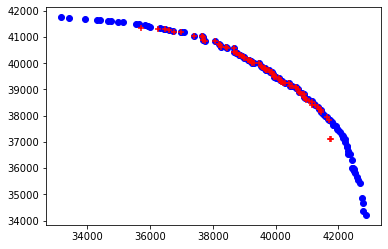

Proportion 50.4 %
Distance moyenne 4.172127710691762


In [11]:
Xe = PLSV3(W, w, S=60)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue', label='exact')
plt.scatter(*zip(*ListS),marker = '+',c = 'red', label='approx')
plt.show()

print("Proportion", PYN(ListS, NonDom)*100, "%")
print("Distance moyenne", DM(ListS, NonDom))

Taille P:7, temps total: 0.58 s
Taille P:18, temps total: 2.52 s
Taille P:21, temps total: 11.76 s
Taille P:31, temps total: 21.99 s
Taille P:33, temps total: 34.08 s
Taille P:41, temps total: 51.68 s
Taille P:56, temps total: 72.35 s
Taille P:57, temps total: 97.97 s
Taille P:64, temps total: 122.22 s
Taille P:64, temps total: 148.01 s
Taille P:52, temps total: 173.05 s
Taille P:63, temps total: 186.63 s
Taille P:67, temps total: 202.91 s
Taille P:53, temps total: 213.49 s
Taille P:41, temps total: 223.53 s
Taille P:14, temps total: 230.11 s
Taille P:4, temps total: 232.09 s
Taille P:1, temps total: 232.53 s
Taille P:0, temps total: 232.63 s


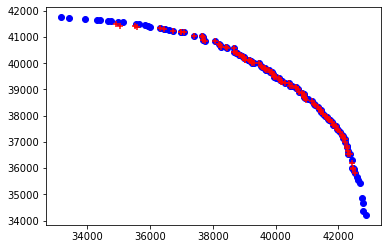

Proportion 73.6 %
Distance moyenne 1.2279572639057184


In [13]:
Xe = PLSV3(W, w, S=10)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue', label='exact')
plt.scatter(*zip(*ListS),marker = '+',c = 'red', label='approx')
plt.show()

print("Proportion", PYN(ListS, NonDom)*100, "%")
print("Distance moyenne", DM(ListS, NonDom))

1
Taille P:1, temps total: 0.01 s
1
Taille P:1, temps total: 0.03 s
49
Taille P:0, temps total: 2.79 s


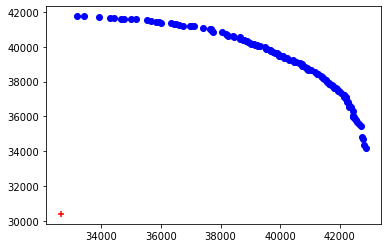

In [228]:
def VoisinV2(x, W, w, L):
    """(TME pour le sac à dos à 2 critères)"""
    q = random.uniform(0, 1)
    n = len(w)
    R_i = [(q*v1[i]+(1-q)*v2[i])/w[i] for i in range(n)]
    R_i=list(zip(R_i,range(n)))
    sortedByValue = sorted(R_i, key=lambda tup: tup[0])
    sortedByValueInv = sorted(R_i, key=lambda tup: tup[0],reverse=True)
    l1=[0]*n
    l2=[0]*n
    cpt=0
    cpt2=0
    for k in sortedByValue:
        if x[k[1]]==1:
            cpt+=1
            l1[k[1]]=1
        if cpt==L:
            break
    for k in sortedByValueInv:
        if x[k[1]]==0:
            cpt2+=1
            l2[k[1]]=1
        if cpt2==L:
            break
    l3=list( map(add, l1, l2))
    NewW= W - sum([w[i]*x[i] for i in range(n) if l1[i]==0])
    neww= []

    for i in range(n):
        if l3[i]==1:
            neww.append(w[i])

    res = PLSV3(NewW, neww,S=1, verbose=False)
    
    ListVoisin=[]
    for k in res:
        temp=[0]*n
        cpt=0
        for j in range(n):
            if l3[j]==1:
                temp[j]=k[cpt]
                cpt+=1
        ListVoisin.append(temp)
#     print("l3",ListVoisin[0])    
    print(len(ListVoisin))
    return ListVoisin
    

def PLSV4(W, w, S, L):
    """(TME pour le sac à dos à 2 critères)"""
    start = time.time()
    P0 = popInitialeV2(W, w, S)
    Xe = P0.copy()
    P = P0.copy()
    Pa = []
    while P != []:
        for p in P:
            voisins = VoisinV2(p, W, w, L)
            for pPrime in voisins:
                if non_domine(pPrime, p):
                    if MiseAJour(Xe, pPrime):
                        MiseAJour(Pa, pPrime)

        P=Pa.copy()
        Pa = []
        print("Taille P:{}, temps total: {:.2f} s".format(len(P), time.time()-start))
    return Xe

Xe = PLSV4(W, w, S=5, L=25)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue')
plt.scatter(*zip(*ListS),marker = '+',c = 'red')
plt.show()